In [ ]:
#insurance.csv

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Load dataset
df=pd.read_csv("insurance.csv")

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [9]:
#Only check null values
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [11]:
#Separate the target(dependent variable) Y and independent variable means X
X=df.drop("insuranceclaim",axis=1)
Y=df["insuranceclaim"] 

In [12]:
#Train_test_split()
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [14]:
from sklearn.metrics import classification_report

In [15]:
#create a function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,y_pred))
    return model

In [16]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [17]:
#create the object of DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [18]:
#call function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       157
           1       0.99      0.99      0.99       245

    accuracy                           0.99       402
   macro avg       0.98      0.98      0.98       402
weighted avg       0.99      0.99      0.99       402



In [ ]:
#Output is very good means great that is perfect model
'''Decision Tree can automatic select the best features(columns).
For feature selection purpose ,Decision Tree are always used.
'''

In [19]:
#Lets checkout what are the important features that are selected by 
#the decision tree 
dt1.feature_importances_ #feature_importances_ inbuilt command of decisiontreeclasifier

array([0.0633924 , 0.        , 0.4259328 , 0.32951284, 0.16581384,
       0.        , 0.01534812])

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [ ]:
#bmi has the highest information gain
#children little less than bmi
#smoker little less than children and bmi
#most imp input features means columns bmi,chidren,smoker 
#which predict the target

In [23]:
features=X.columns

In [22]:
from sklearn import tree

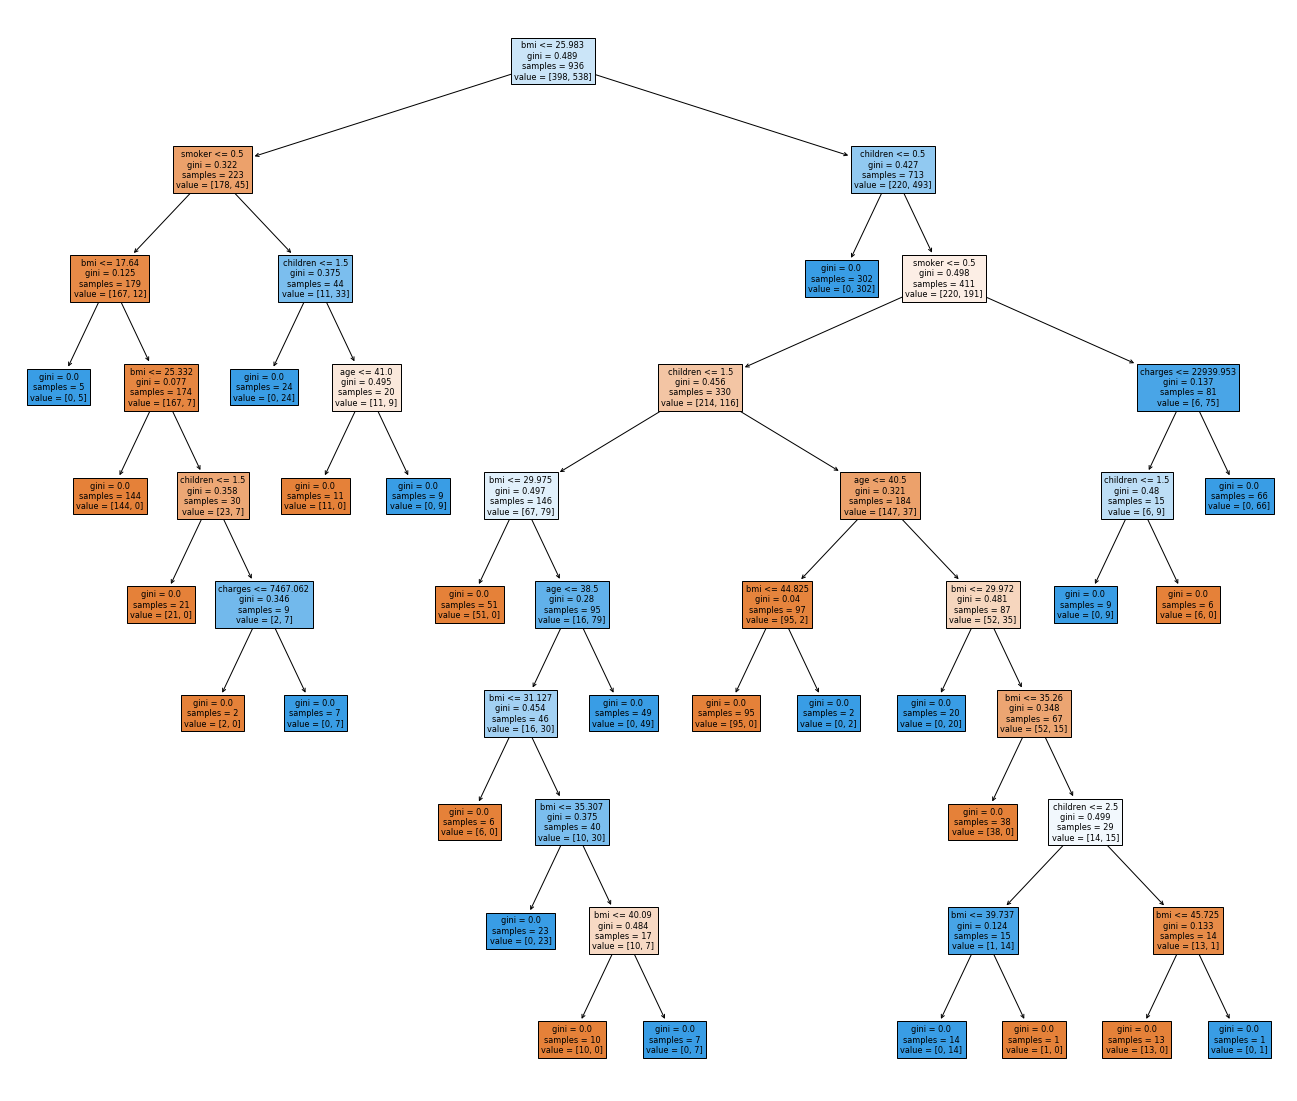

In [24]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)